# Demo and Visualizations

This file contains tests for determining validity of 2D Diffusion Equation Solver

**Iterative Solver Tests**

We first start off by testing the iterative solvers

In [2]:
%run iterative_solvers.ipynb

In [3]:
# Test adapted from hw problem

import numpy as np
import scipy as sci
from scipy import sparse
from scipy import linalg

# Define A with built in functions
n = 5
vals = [-1., 3., -1.]
diags = [-1, 0, 1]
A = sci.sparse.diags(vals, diags, shape=(n,n)).todense()

# rhs and first guess
b = 100.0*np.ones(n)
x_0 = np.zeros(n)

# For reference:
x_ref = np.linalg.solve(A,b)
print("reference solution:\n", x_ref)

reference solution:
 [61.11111111 83.33333333 88.88888889 83.33333333 61.11111111]


In [4]:
# Jacobi
(itr_J,x_J) = jacobi_solver(np.array(A), np.array(b).flatten(), np.array(x_0).flatten(), 1.e-6)
print("Jacobi abs 1e-6 solution\n", x_J)
print("\nJacobi abs 1e-6 iteration count\n",itr_J,"\n")

# Gauss Seidel
(itr_GS,x_GS) = gauss_sedidel_solver(np.array(A), np.array(b).flatten(), np.array(x_0).flatten(), 1.e-6)
print("GS abs 1e-6 solution\n", x_GS)
print("\nGS abs 1e-6 iteration count\n",itr_GS,"\n")

# SOR, omega = 1.15
omega=1.15
(itr_SOR,x_SOR) = sor_solver(np.array(A), np.array(b).flatten(), np.array(x_0).flatten(), 1.e-6)
print("SOR abs 1e-6 solution\n", x_SOR)
print("\nSOR abs 1e-6 iteration count\n",itr_SOR)

Jacobi abs 1e-6 solution
 [61.111058842321576, 83.33323924951218, 88.88878435130982, 83.33323924951218, 61.111058842321576]

Jacobi abs 1e-6 iteration count
 25 

GS abs 1e-6 solution
 [61.11106232699278, 83.33328454915817, 88.8888563660865, 83.33331707192897, 61.11110569064299]

GS abs 1e-6 iteration count
 14 

SOR abs 1e-6 solution
 [61.1108812630212, 83.33320658708325, 88.88883332491011, 83.33331672721079, 61.11110785971579]

SOR abs 1e-6 iteration count
 8


As seen above, the number if iterations decrease from Jacobi to SOR for finding a solution with the same error tolerance

**2D Solver Tests**

In [5]:
%run 2Dsolver.ipynb
import matplotlib.pyplot as plt

In [6]:
x_pos = np.array([0,2,4])
y_pos = np.array([0,2,4])
D_mesh = np.array([[1,1],[1,1]])
abs_mesh = np.array([[0,0],[0,0]])
source_mesh = np.array([[0,0],[0,0]])

In [7]:
# plt.set_cmap('copper')
# plt.pcolormesh(x_pos, y_pos, D_mesh)
# plt.colorbar();

In [8]:
iterations,fluxes = two_D_DEsolver(x_pos, y_pos, D_mesh, abs_mesh, source_mesh)
print(fluxes)

[0.0, 0.0, 0.0, 0.0, 1.0254144751127276e-162, 8.922707752624395e-163, 0.0, 8.922707752624395e-163, 7.764149577661378e-163]


<ipython-input-5-631b2ae4de20>:58: RuntimeWarning: invalid value encountered in double_scalars
  err = np.linalg.norm(x1-answer[-2])/np.linalg.norm(x1)


The above code runs a RuntimeWarning and the output fluxes are approximately 0. This makes sense since there is no source term and no macroscopic absorption

In [9]:
x_pos = np.array([1,3,5,7])
y_pos = np.array([1,3,5,7])
D_mesh = np.array([[1,1,1],[1,1,1],[1,1,1]])
abs_mesh = np.array([[0,0,0],[0,0,0],[0,0,0]])
source_mesh = np.array([[1,1,1],[1,1,1],[1,1,1]])
iterations,fluxes = two_D_DEsolver(x_pos, y_pos, D_mesh, abs_mesh, source_mesh)
print(fluxes)

[-2.500000000000074e-34, -2.500000000000074e-34, -2.500000000000074e-34, -2.500000000000074e-34, -2.500000000000074e-34, 3.807666505284335, 5.615347409650588, 6.153810388020319, -2.500000000000074e-34, 5.615347409650588, 8.499946351261247, 9.384563812149562, -2.500000000000074e-34, 6.153810388020319, 9.384563812149562, 10.384565808068146]


In [10]:
len(fluxes)

16

Adding a source term and having overall absorbtion mesh equal to 0 gives the above results for fluxes. These can be plotted as a color mesh shown below 

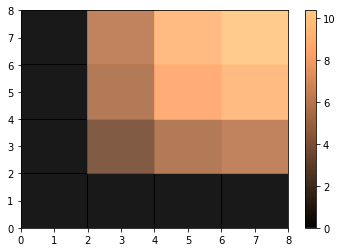

In [89]:
plt.set_cmap('copper')
plt.pcolormesh(x_pos, y_pos,np.reshape(fluxes,(len(y_pos),len(x_pos))),shading="nearest",alpha=0.9)
plt.colorbar();

**2D Solver Demo**

After testing, the following lines of code show flux analysis with varying physical parameters such as difusion coefficient, source and macroscopic cross section of absorbtion. 

*Varying Diffusion Coefficient*

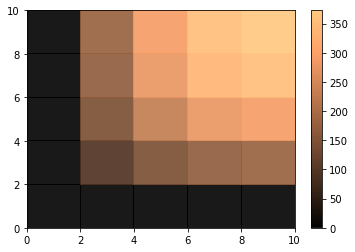

In [149]:
x_pos1 = np.array([1,3,5,7,9])
y_pos1 = np.array([1,3,5,7,9])
D_mesh1 = np.array([[.5,.5,.5,.5],
                  [.5,.5,.5,.5],
                  [.5,.5,.5,.5],
                  [.5,.5,.5,.5]])
abs_mesh1 = np.array([[0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0]])
source_mesh1 = np.array([[10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10]])
iterations1,fluxes1 = two_D_DEsolver(x_pos1, y_pos1, D_mesh1, abs_mesh1, source_mesh1)
plt.pcolormesh(x_pos1, y_pos1,np.reshape(fluxes1,(len(y_pos1),len(x_pos1))),shading="auto",alpha=0.9)
plt.colorbar();

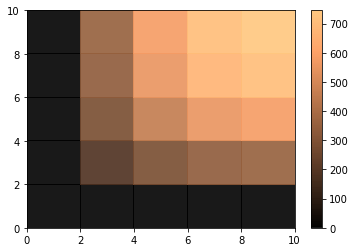

In [148]:
x_pos = np.array([1,3,5,7,9])
y_pos = np.array([1,3,5,7,9])
D_mesh = np.array([[0.25,0.25,0.25,0.25],
                  [0.25,0.25,0.25,0.25],
                  [0.25,0.25,0.25,0.25],
                  [0.25,0.25,0.25,0.25]])
abs_mesh = np.array([[0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0]])
source_mesh = np.array([[10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10]])
iterations,fluxes = two_D_DEsolver(x_pos, y_pos, D_mesh, abs_mesh, source_mesh)
plt.pcolormesh(x_pos, y_pos,np.reshape(fluxes,(len(y_pos),len(x_pos))),shading="auto",alpha=0.9)
plt.colorbar();

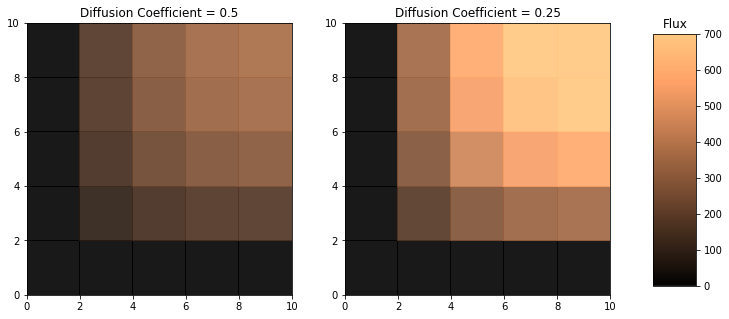

In [169]:
n=0
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 5))
for ax in axes.flat:
    if n==0:
        im = ax.pcolormesh(x_pos1, y_pos1,np.reshape(fluxes1,(len(y_pos1),len(x_pos1))),shading="auto",alpha=0.9,vmin=0,vmax=700)
        n=1
    else:
        im = ax.pcolormesh(x_pos, y_pos,np.reshape(fluxes,(len(y_pos),len(x_pos))),shading="auto",alpha=0.9,vmin=0,vmax=700)

axes[0].set_title('Diffusion Coefficient = 0.5')
axes[1].set_title('Diffusion Coefficient = 0.25')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.title("Flux")
plt.show()

*Varying Macroscopic Cross Section for Absorption*

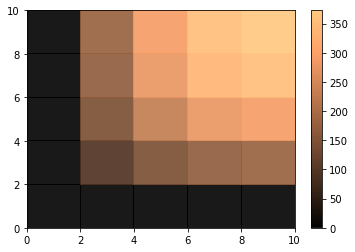

In [177]:
x_pos1 = np.array([1,3,5,7,9])
y_pos1 = np.array([1,3,5,7,9])
D_mesh1 = np.array([[.5,.5,.5,.5],
                  [.5,.5,.5,.5],
                  [.5,.5,.5,.5],
                  [.5,.5,.5,.5]])
abs_mesh1 = np.array([[0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0],
                  [0,0,0,0]])
source_mesh1 = np.array([[10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10]])
iterations1,fluxes1 = two_D_DEsolver(x_pos1, y_pos1, D_mesh1, abs_mesh1, source_mesh1)
plt.pcolormesh(x_pos1, y_pos1,np.reshape(fluxes1,(len(y_pos1),len(x_pos1))),shading="auto",alpha=0.9)
plt.colorbar();

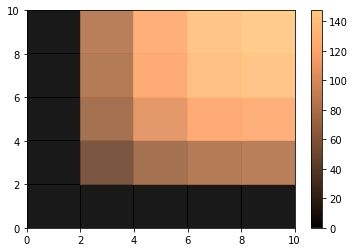

In [178]:
x_pos = np.array([1,3,5,7,9])
y_pos = np.array([1,3,5,7,9])
D_mesh = np.array([[.5,.5,.5,.5],
                  [.5,.5,.5,.5],
                  [.5,.5,.5,.5],
                  [.5,.5,.5,.5]])
abs_mesh = np.array([[.05,.05,.05,.05],
                  [.05,.05,.05,.05],
                  [.05,.05,.05,.05],
                  [.05,.05,.05,.05]])
source_mesh = np.array([[10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10],
                  [10,10,10,10]])
iterations,fluxes = two_D_DEsolver(x_pos, y_pos, D_mesh, abs_mesh, source_mesh)
plt.pcolormesh(x_pos, y_pos,np.reshape(fluxes,(len(y_pos),len(x_pos))),shading="auto",alpha=0.9)
plt.colorbar();

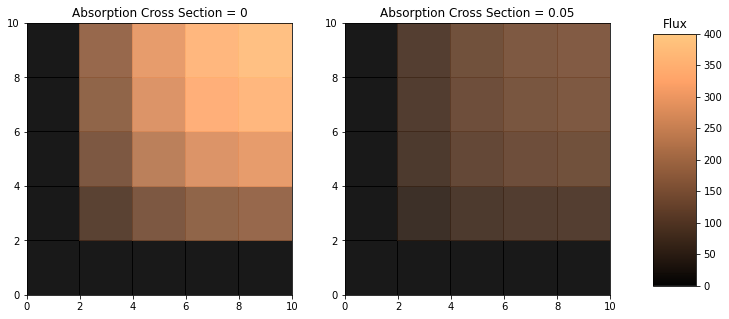

In [179]:
n=0
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 5))
for ax in axes.flat:
    if n==0:
        im = ax.pcolormesh(x_pos1, y_pos1,np.reshape(fluxes1,(len(y_pos1),len(x_pos1))),shading="auto",alpha=0.9,vmin=0,vmax=400)
        n=1
    else:
        im = ax.pcolormesh(x_pos, y_pos,np.reshape(fluxes,(len(y_pos),len(x_pos))),shading="auto",alpha=0.9,vmin=0,vmax=400)

axes[0].set_title('Absorption Cross Section = 0')
axes[1].set_title('Absorption Cross Section = 0.05')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.title("Flux")
plt.show()